##### Choosing a setup

<a href="https://colab.research.google.com/github/rahil1303/dmt-assignment1-2025/blob/main/notebooks/Iteration_1_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import numpy as np
from datetime import datetime

In [6]:
# Step 1: Clone the repo
#!git clone https://github.com/rahil1303/dmt-assignment1-2025.git

# Step 2: Change directory to your repo
#%cd dmt-assignment1-2025

# Step 3: Install dependencies (optional)
#!pip install -r requirements.txt

# Using locally:
#os.chdir('dmt-assignment1-2025')
os.chdir('..')
os.getcwd()

'/home/ivanka/data-mining/dmt-assignment1-2025'

In [47]:
import pandas as pd
df = pd.read_excel("data/ODI-2025.xlsx")

In [48]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


#### Step 1: Rename columns for clarity 
The original dataset had long and inconsistent column names, including survey question text. To make the dataset easier to work with and improve readability in our code, I renamed the columns to concise names.

In [8]:
# rename columns
df = df.rename(columns={
    'Tijdstempel':'TIMESTAMP',
    'What programme are you in?': 'PROGRAM',
    'Have you taken a course on machine learning?': 'ML_COURSE',
    'Have you taken a course on information retrieval?': 'IR_COURSE',
    'Have you taken a course on statistics?': 'STAT_COURSE',
    'Have you taken a course on databases?': 'DB_COURSE',
    'What is your gender?':'GENDER',
    'I have used ChatGPT to help me with some of my study assignments ': 'CHATGPT_USAGE',
    'When is your birthday (date)?': 'BIRTHDAY',
    'How many students do you estimate there are in the room?': 'ROOM_ESTIMATE',
    'What is your stress level (0-100)?': 'STRESS_LEVEL',
    'How many hours per week do you do sports (in whole hours)? ': 'SPORTS_HOURS',
    'Give a random number': 'RANDOM_NUMBER',
    'Time you went to bed Yesterday': 'BEDTIME',
    'What makes a good day for you (1)?': 'GOOD_DAY_1',
    'What makes a good day for you (2)?': 'GOOD_DAY_2'
})

In [9]:
df.head()

,TIMESTAMP,PROGRAM,ML_COURSE,IR_COURSE,STAT_COURSE,DB_COURSE,GENDER,CHATGPT_USAGE,BIRTHDAY,ROOM_ESTIMATE,STRESS_LEVEL,SPORTS_HOURS,RANDOM_NUMBER,BEDTIME,GOOD_DAY_1,GOOD_DAY_2
0,2025-04-01 12:17:06.560,MSc Artificial Intelligence,yes,unknown,mu,ja,male,yes,01-01-1888,400,78,0,928393,00:00,Food,Travel
1,2025-04-01 12:17:14.118,Artificial Intelligence,yes,1,sigma,ja,female,yes,31/01/2002,321,1000,2,31416,12:30,sun,coffee
2,2025-04-01 12:17:16.917,Econometrics,yes,1,mu,ja,male,not willing to say,September,200,101,4,5,0:30,Zonnetje,Aperol
3,2025-04-01 12:17:20.718,Econometrics - Data Science,yes,0,mu,nee,male,yes,17/10/2003,350,60,6,37,23:00,Sun,Sun
4,2025-04-01 12:17:23.836,Bioinformatics’s & Systems Biology,yes,1,mu,ja,male,yes,19/04/2000,500,50,8,1,12,-,-


##### Step 2: Standardizing program names

In [10]:
# Clean and categorize the PROGRAM entries
def standardize_program(program):
    if pd.isna(program):
        return program

    program = str(program).lower()

    if re.search(r'\b(artificial|ai|intelligence)\b', program):
        return 'Artificial Intelligence'
    elif re.search(r'\b(computer science|cs|security|big|green)\b', program):
        return 'Computer Science'
    elif re.search(r'\bcomputational science\b', program):
        return 'Computational Science'
    elif re.search(r'\beconometrics\b', program):
        return 'Econometrics and Operations Research'
    elif re.search(r'\b(bioinformatics|bioinfomatics|biosb)\b', program):
        return 'Bioinformatics and Systems Biology'
    elif re.search(r'\bbusiness\b', program):
        return 'Business Analytics'
    elif re.search(r'\bfinance\b', program):
        return 'Finance and Technology'
    elif re.search(r'\bhuman|humanities\b', program):
        return 'Humanities Research'
    elif re.search(r'\bhealth\b', program):
        return 'Health Sciences'
    elif re.search(r'\bbiomedical\b', program):
        return 'Biomedical Sciences'
    elif re.search(r'\bfintech\b', program):
        return 'Fintech and Regulation'
    elif program in [
        "npn", "comp sci", "eor", "master", "ba"
    ]:
        return 'OTHER'
    else:
        return program.title()  # optional: title case for readability

# Apply once
df['PROGRAM'] = df['PROGRAM'].apply(standardize_program)


In [11]:
df["PROGRAM"].value_counts()

PROGRAM
Artificial Intelligence                                  100
Computer Science                                          50
Econometrics and Operations Research                      23
Bioinformatics and Systems Biology                        20
Computational Science                                     17
Business Analytics                                        16
Finance and Technology                                     6
OTHER                                                      5
Humanities Research                                        3
Health Sciences                                            1
Mathematics                                                1
Biomedical Sciences                                        1
Fintech and Regulation                                     1
B-123456789():;,.?-€/&@„_<|>#,{%^*+=•£$$< \N\+2332‘Mm      1
Name: count, dtype: int64

<small>**Note:** There is one entry in the PROGRAM column that appears to be corrupted. The row may still contain useful responses in other columns. For now, this instance is retained and categorized under OTHER to preserve potentially valuable information.

In [12]:
df.loc[df.tail(1).index, 'PROGRAM'] = 'OTHER'  # For the last entry

In [13]:
df.tail(1)

,TIMESTAMP,PROGRAM,ML_COURSE,IR_COURSE,STAT_COURSE,DB_COURSE,GENDER,CHATGPT_USAGE,BIRTHDAY,ROOM_ESTIMATE,STRESS_LEVEL,SPORTS_HOURS,RANDOM_NUMBER,BEDTIME,GOOD_DAY_1,GOOD_DAY_2
244,2025-04-01 12:29:46.856,OTHER,unknown,0,sigma,nee,intersex,no,"/U+200B/-1/-0/-0.0f/-0,0d Long int 12-0/:0;",-1,2147483649999999999,2149483649,9999999999999999999998899888888888777778889999...,0 AD,()€€€€& ../rm -rf ~/* hdhdhdh,Alcohol


In [14]:
df['PROGRAM'].value_counts()

PROGRAM
Artificial Intelligence                 100
Computer Science                         50
Econometrics and Operations Research     23
Bioinformatics and Systems Biology       20
Computational Science                    17
Business Analytics                       16
OTHER                                     6
Finance and Technology                    6
Humanities Research                       3
Health Sciences                           1
Mathematics                               1
Biomedical Sciences                       1
Fintech and Regulation                    1
Name: count, dtype: int64

PROBLEM:

<small> There are corrupted values in the last instance, under `BIRTHDAY` and `GOOD_DAY_1`

##### STEP 3: creating numerical values for courses

<small> Categorical values to numerical values for the following columns:
- **ML_COURSE**: `'yes'` → 1, `'no'` → 0, `'unknown'` → NaN
- **IR_COURSE**: `1` → 1, `0` → 0, `'unknown'` → NaN
- **DB_COURSE**: `'ja'` → 1, `'nee'` → 0, `'unknown'` → NaN
- **CHATGPT_USAGE**: `'yes'` → 1, `'no'` → 0, `'unknown'` → NaN

These mappings are stored in new columns (`_NUM`) as nullable integers (`Int64`).

In [15]:
# Mapping dictionary for each column and their corresponding transformations
mapping_dict = {
    'ML_COURSE': {'yes': 1, 'no': 0, 'unknown': np.nan},
    'IR_COURSE': {1: 1, 0: 0, 'unknown': np.nan},
    'DB_COURSE': {'ja': 1, 'nee': 0, 'unknown': np.nan},
    'CHATGPT_USAGE': {'yes': 1, 'no': 0, 'unknown': np.nan}
}

# Apply mappings and convert to 'Int64' for numerical columns where applicable
df['ML_COURSE_NUM'] = df['ML_COURSE'].map(mapping_dict['ML_COURSE']).astype('Int64')
df['IR_COURSE_NUM'] = df['IR_COURSE'].map(mapping_dict['IR_COURSE']).astype('Int64')
df['DB_COURSE_NUM'] = df['DB_COURSE'].map(mapping_dict['DB_COURSE']).astype('Int64')
df['CHATGPT_USAGE_NUM'] = df['CHATGPT_USAGE'].map(mapping_dict['CHATGPT_USAGE']).astype('Int64')

In [16]:
df.head()

,TIMESTAMP,PROGRAM,ML_COURSE,IR_COURSE,STAT_COURSE,DB_COURSE,GENDER,CHATGPT_USAGE,BIRTHDAY,ROOM_ESTIMATE,STRESS_LEVEL,SPORTS_HOURS,RANDOM_NUMBER,BEDTIME,GOOD_DAY_1,GOOD_DAY_2,ML_COURSE_NUM,IR_COURSE_NUM,DB_COURSE_NUM,CHATGPT_USAGE_NUM
0,2025-04-01 12:17:06.560,Artificial Intelligence,yes,unknown,mu,ja,male,yes,01-01-1888,400,78,0,928393,00:00,Food,Travel,1,<NA>,1,1
1,2025-04-01 12:17:14.118,Artificial Intelligence,yes,1,sigma,ja,female,yes,31/01/2002,321,1000,2,31416,12:30,sun,coffee,1,1,1,1
2,2025-04-01 12:17:16.917,Econometrics and Operations Research,yes,1,mu,ja,male,not willing to say,September,200,101,4,5,0:30,Zonnetje,Aperol,1,1,1,<NA>
3,2025-04-01 12:17:20.718,Econometrics and Operations Research,yes,0,mu,nee,male,yes,17/10/2003,350,60,6,37,23:00,Sun,Sun,1,0,0,1
4,2025-04-01 12:17:23.836,Bioinformatics and Systems Biology,yes,1,mu,ja,male,yes,19/04/2000,500,50,8,1,12,-,-,1,1,1,1


##### Step 4: categorizing gender

In [17]:
df["GENDER"].value_counts()

GENDER
male                     137
female                    89
not willing to answer      9
gender fluid               4
intersex                   4
non-binary                 1
other                      1
Name: count, dtype: int64

<small> The `categorize_gender` function maps known gender values (`'male'`, `'female'`, `'not willing to answer'`) directly, while grouping all other values into the category `'gender_non_conforming'`. *Reasons: reducing the number of groups, making less-represented genders more visible, and promoting pseudonymization*

In [18]:
def categorize_gender(value):
    # Direct mapping for known values
    gender_map = {
        'male': 'male',
        'female': 'female',
        'not willing to answer': 'unknown'
    }
    
    # Apply map for known values, otherwise classify as 'gender_non_conforming'
    return gender_map.get(value, 'gender_non_conforming')

# Apply to the 'GENDER' column and save in 'GENDER_CATEGORIZED'
df['GENDER_CATEGORIZED'] = df['GENDER'].apply(categorize_gender)

In [19]:
df["GENDER_CATEGORIZED"].value_counts()

GENDER_CATEGORIZED
male                     137
female                    89
gender_non_conforming     10
unknown                    9
Name: count, dtype: int64

#### STEP 5: room estimate

In [20]:
df["ROOM_ESTIMATE"].unique()

array([400, 321, 200, 350, 500, 467, 250, 345, 300, 100, 550, '180-200',
       456, '20*5*5', 487, 490, 450, 600, 320, 150, 375, 187, 80, 220,
       430, 380, 5, 330, 385, 390, 195, 234, 480, 291, 420, 289, 70000,
       425, 287, 483, 'approx 300', 240, 357, 297, 366, 123, '300ish?',
       125, 378, 'Around 200', 280, 230, 118, 'Idk', 460, 340, 384, 9000,
       311, 253, -9999, 180, 458, 210, 10000, 387, 520, -3, -1],
      dtype=object)

<small> The `ROOM_ESTIMATE_CLEANED` column replaces irregular or ambiguous room estimate entries with standardized numerical values. *Reasons: consistency and handling unknown values as NaN.*

In [21]:
df['ROOM_ESTIMATE_CLEANED'] = df['ROOM_ESTIMATE'].replace({
    '180-200': 190,
    '20*5*5': 500,
    'approx 300': 300,
    '300ish?': 300,
    'Around 200': 200,
    'Idk': np.nan
})

/tmp/ipykernel_1687/3522324179.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ROOM_ESTIMATE_CLEANED'] = df['ROOM_ESTIMATE'].replace({


In [22]:
df["ROOM_ESTIMATE_CLEANED"].unique()

array([ 4.000e+02,  3.210e+02,  2.000e+02,  3.500e+02,  5.000e+02,
        4.670e+02,  2.500e+02,  3.450e+02,  3.000e+02,  1.000e+02,
        5.500e+02,  1.900e+02,  4.560e+02,  4.870e+02,  4.900e+02,
        4.500e+02,  6.000e+02,  3.200e+02,  1.500e+02,  3.750e+02,
        1.870e+02,  8.000e+01,  2.200e+02,  4.300e+02,  3.800e+02,
        5.000e+00,  3.300e+02,  3.850e+02,  3.900e+02,  1.950e+02,
        2.340e+02,  4.800e+02,  2.910e+02,  4.200e+02,  2.890e+02,
        7.000e+04,  4.250e+02,  2.870e+02,  4.830e+02,  2.400e+02,
        3.570e+02,  2.970e+02,  3.660e+02,  1.230e+02,  1.250e+02,
        3.780e+02,  2.800e+02,  2.300e+02,  1.180e+02,        nan,
        4.600e+02,  3.400e+02,  3.840e+02,  9.000e+03,  3.110e+02,
        2.530e+02, -9.999e+03,  1.800e+02,  4.580e+02,  2.100e+02,
        1.000e+04,  3.870e+02,  5.200e+02, -3.000e+00, -1.000e+00])

PROBLEM:

<small> There are still negative values or extreme over-estimations present, which will need further attention to avoid skewing analysis.

##### Step 6: stress level

In [23]:
df["STRESS_LEVEL"].unique()

array([78, 1000, 101, 60, 50, 99.7, 30, 70, 100, 20, 5, 8, 9999, 15, 75,
       100000000000000, 2, 3, 55, 80, 10, 45, 89, 0, 49, 72, 6, 13, 11,
       35, 66, 90, 40, 65, 200, 42, 99999, 47, 37, 'Over 9000', 79,
       '42.0', 85, 25, 110, 900, 22, 23, 67, 1, 69, 'π©', 7, 57, -10, 99,
       24, 87, -10000, 58, 23.23, 98, -1, 'Now? 22', 77, nan, 63, 61, 33,
       'I BELIEVE I CAN FLY', '2147483649999999999'], dtype=object)

<small> `STRESS_LEVEL` column contains the numbers students chose, just not numerical. There aren't a lot of these, so we map them into the right formatting. *NOTE: I assume 'I BELIEVE I CAN FLY' means stress level 0, but that might not be right.*

In [36]:
# Mapping non-numerical entries that contain numerical answers
stress_level_mapping = {
    'π©': 3.14,  
    'Over 9000': 9000,  
    '42.0': 42,  
    'Now? 22': 22,  
    'I BELIEVE I CAN FLY': 0,
}


def clean_stress_level(value):
    # if in dictionary, return the mapped value
    if value in stress_level_mapping:
        return stress_level_mapping[value]
    # otherwise return the original value
    return value

# Apply the cleaning
df['STRESS_LEVEL_CLEANED'] = df['STRESS_LEVEL'].apply(clean_stress_level)


In [37]:
df['STRESS_LEVEL_CLEANED'].unique()

array([78, 1000, 101, 60, 50, 99.7, 30, 70, 100, 20, 5, 8, 9999, 15, 75,
       100000000000000, 2, 3, 55, 80, 10, 45, 89, 0, 49, 72, 6, 13, 11,
       35, 66, 90, 40, 65, 200, 42, 99999, 47, 37, 9000, 79, 85, 25, 110,
       900, 22, 23, 67, 1, 69, 3.14, 7, 57, -10, 99, 24, 87, -10000, 58,
       23.23, 98, -1, 77, nan, 63, 61, 33, '2147483649999999999'],
      dtype=object)

<small> `STRESS_LEVEL` column contains one number that is written as a string.

In [38]:
# Convert to numeric values, coercing errors to NaN
df['STRESS_LEVEL_CLEANED'] = pd.to_numeric(df['STRESS_LEVEL_CLEANED'], errors='coerce')

<small> `STRESS_LEVEL` column contains numbers out of bound 0-100 so we map anything that's lower then 0 to 0 and anything higher than 100 to 100.

In [39]:
# Cap values at 100 and set values below 0 to 0
df['STRESS_LEVEL_CLEANED'] = df['STRESS_LEVEL_CLEANED'].clip(lower=0, upper=100)

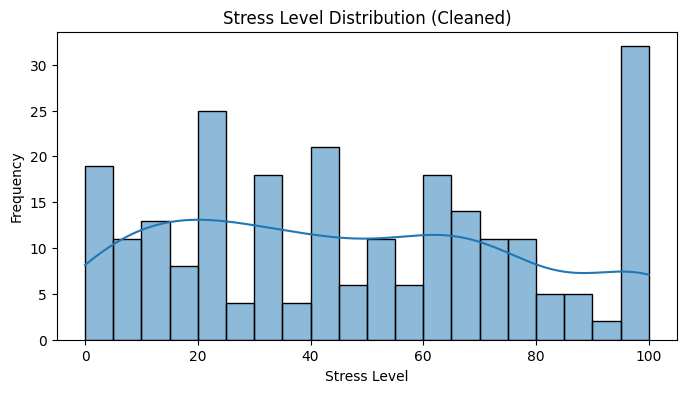

In [45]:
# Plot the cleaned column
plt.figure(figsize=(8,4))
sns.histplot(df['STRESS_LEVEL_CLEANED'].dropna(), bins=20, kde=True)
plt.title("Stress Level Distribution (Cleaned)")
plt.xlabel("Stress Level")
plt.ylabel("Frequency")
plt.show()


In [44]:
df['STRESS_LEVEL_CLEANED'].isna().sum()

1

In [35]:
df['STRESS_LEVEL_CLEANED'].value_counts()

STRESS_LEVEL_CLEANED
100.00    28
20.00     19
40.00     19
30.00     17
60.00     16
0.00      12
50.00     11
70.00     10
10.00      9
75.00      8
15.00      8
65.00      6
69.00      6
5.00       5
80.00      5
25.00      4
2.00       4
85.00      3
45.00      3
55.00      3
35.00      3
8.00       3
22.00      2
90.00      2
42.00      2
47.00      2
23.00      2
58.00      2
11.00      2
13.00      2
99.00      2
6.00       2
72.00      1
49.00      1
78.00      1
99.70      1
89.00      1
3.00       1
37.00      1
79.00      1
66.00      1
1.00       1
3.14       1
7.00       1
57.00      1
67.00      1
24.00      1
87.00      1
23.23      1
98.00      1
77.00      1
63.00      1
61.00      1
33.00      1
Name: count, dtype: int64

#### Step 7: sports hours

In [128]:
df["SPORTS_HOURS"].unique()

array([0, 2, 4, 6, 8, 1, 3, 4.5, 7, 10, 12, '4-5', 9, 5, 69, 15, 20, 23,
       168, '4.5', '2h', '0😭😭😭', 'zero', '3-4', 16, 14, 200, 11, 4.6,
       '4.5 hours', 13, '&&&&', 2149483649], dtype=object)

<small> **Mapping known values:**
- mapping specific, inconsistent entries in the `SPORTS_HOURS` column to cleaner and standardized numeric values. For example, '4-5' becomes 4.5 (average of 4 and 5), '2h' becomes 2, and 'zero' or '0😭😭😭' becomes 0
- the column is converted to numeric values using `pd.to_numeric()` to handle any remaining non-numeric entries


In [129]:
# Mapping specific known values to cleaned versions
replace_map = {
    '4-5': 4.5, # Average of 4 and 5
    'zero': 0,
    '0😭😭😭': 0,
    '2h': 2,
    '4.5 hours': 4.5,
    '4.5': 4.5,
    '3-4': 3.5,  # Average of 3 and 4
    '&&&&': np.nan,  # Replace unrecognizable characters with NaN
}

# replace the values in 'SPORTS_HOURS' column
df['SPORTS_HOURS_CLEANED'] = df['SPORTS_HOURS'].replace(replace_map)

# convert values to float
df['SPORTS_HOURS_CLEANED'] = pd.to_numeric(df['SPORTS_HOURS_CLEANED'], errors='coerce')

/tmp/ipykernel_1608/1319620069.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['SPORTS_HOURS_CLEANED'] = df['SPORTS_HOURS'].replace(replace_map)


<small> **Handling unreasonable values:**
   - A threshold of 60 hours per week is applied, as anything beyond this is considered an unrealistic entry. Any values greater than 60 are replaced with `NaN` to avoid distortions for now

In [132]:
# the threshold for maximum possible exercise hours per week
max_exercise_hours = 60

# replace values greater than max_exercise_hours with NaN
df['SPORTS_HOURS_CLEANED'] = df['SPORTS_HOURS_CLEANED'].apply(
    lambda x: np.nan if x > max_exercise_hours else x
)

In [133]:
df['SPORTS_HOURS_CLEANED'].unique()

array([ 0. ,  2. ,  4. ,  6. ,  8. ,  1. ,  3. ,  4.5,  7. , 10. , 12. ,
        9. ,  5. ,  nan, 15. , 20. , 23. ,  3.5, 16. , 14. , 11. ,  4.6,
       13. ])

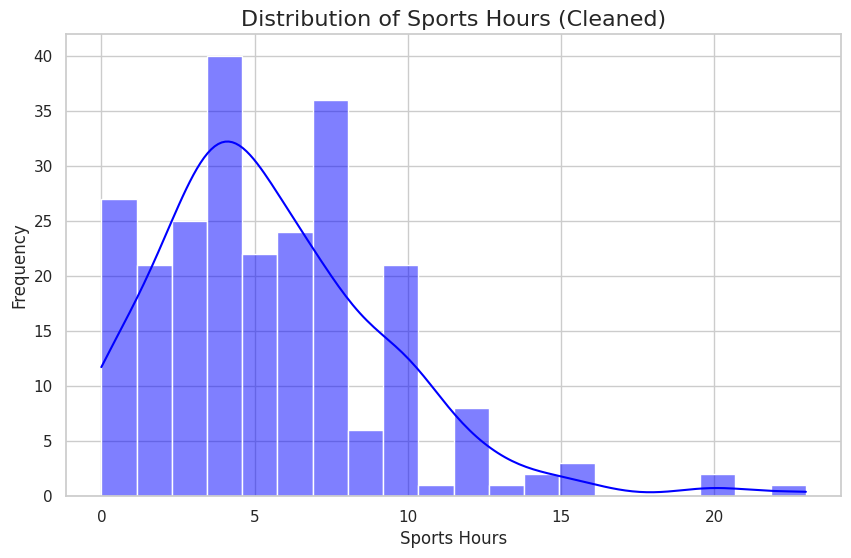

In [137]:
# Set the Seaborn style
sns.set(style="whitegrid")

# Plotting the distribution of cleaned sports hours
plt.figure(figsize=(10, 6))
sns.histplot(df['SPORTS_HOURS_CLEANED'], kde=True, color="blue", bins=20)  # kde=True adds a density curve
plt.title("Distribution of Sports Hours (Cleaned)", fontsize=16)
plt.xlabel("Sports Hours", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


##### Step 9: random numbers

In [139]:
df["RANDOM_NUMBER"].unique()

array([928393, 31416, 5, 37, 1, 0, 4, 6656678, 888, '420420420420420420',
       3, 538299189101, 1984, 72, 7, 94, 13, 28, 9, 8, 6372, 27, 9999, 78,
       38, 19, 777, 74, 99, 25, 108, 4738, 11011011, 87, 39,
       '77945354356758979022123', 1934, 69420, 14, 69, 420, 66,
       '199389299284884742829r7747r8e9w929e94747uch38838udud8388383838e8e8e8e8e8e8d8du8s888x8d88d8u',
       '2324234234234432434', 73, -1, 358, 42, 61, 6969696, 95836,
       'Random', 12, 47, 89, 4141, 15, 6, 168, 5347833, 7777, 77, 30, 10,
       197367, 40, 11, 9581995819194, 89867, 658, 236, 1738,
       '184365902143674301', 33, 64, 314159265359, 44, 426, 891230124,
       124, 9999999999, 67, 23, 'Ø', 81, 3737,
       '245819732157863251872726618812736168172715169485342146436918753',
       'cleanMe12', 18282, 17, 75, 46789901874822496, 31,
       'achtduizendvierhonderdvijfendertig komma zesenvijftig',
       173425111379664, 271828, 21, 1672, 823, 51, 8473, '27.4', 22,
       55678686, 90, '85828228182566372

<small> 

- **Mapping Specific Known Values:**  
  Specific, known values are mapped to clean numeric equivalents or `NaN`. For example, `‘cleanMe12’` becomes 12, and strings like `‘Ø’` or `‘Random’` or the emoji (such as `‘😅’`) are replaced with `NaN`.

- **Converting Strings to Numeric Values:**  
  The function attempts to convert any string representation of numbers (like `‘-69420’`) into actual numeric values.


In [140]:
def clean_random_number(value):
    # Define the specific mappings
    mappings = {
        'Random': np.nan,
        'cleanMe12': 12,
        'achtduizendvierhonderdvijfendertig komma zesenvijftig': 8435.56,
        'Ø': np.nan,
        '“-69420”': -69420,
        '199389299284884742829r7747r8e9w929e94747uch38838udud8388383838e8e8e8e8e8e8d8du8s888x8d88d8u': np.nan
    }
    
    # check if it's an emoji
    if isinstance(value, str) and re.match(r'\U0001F605', value):  # Checks for '😅' emoji
        return np.nan
    
    # the value is in the mapping
    if value in mappings:
        return mappings[value]
    
    # numeric strings and other cases
    try:
        # convert to a number if possible (this will handle things like "-69420")
        return float(value)
    except ValueError:
        return value

# Apply the cleaning function to the column
df['RANDOM_NUMBER_CLEANED'] = df['RANDOM_NUMBER'].apply(clean_random_number)

In [141]:
df["RANDOM_NUMBER_CLEANED"].unique()

array([928393.0, 31416.0, 5.0, 37.0, 1.0, 0.0, 4.0, 6656678.0, 888.0,
       4.204204204204204e+17, 3.0, 538299189101.0, 1984.0, 72.0, 7.0,
       94.0, 13.0, 28.0, 9.0, 8.0, 6372.0, 27.0, 9999.0, 78.0, 38.0, 19.0,
       777.0, 74.0, 99.0, 25.0, 108.0, 4738.0, 11011011.0, 87.0, 39.0,
       7.794535435675898e+22, 1934.0, 69420.0, 14.0, 69.0, 420.0, 66.0,
       nan, 2.3242342342344325e+18, 73.0, -1.0, 358.0, 42.0, 61.0,
       6969696.0, 95836.0, 12.0, 47.0, 89.0, 4141.0, 15.0, 6.0, 168.0,
       5347833.0, 7777.0, 77.0, 30.0, 10.0, 197367.0, 40.0, 11.0,
       9581995819194.0, 89867.0, 658.0, 236.0, 1738.0,
       1.843659021436743e+17, 33.0, 64.0, 314159265359.0, 44.0, 426.0,
       891230124.0, 124.0, 9999999999.0, 67.0, 23.0, 81.0, 3737.0,
       2.4581973215786324e+62, 18282.0, 17.0, 75.0, 4.67899018748225e+16,
       31.0, 8435.56, 173425111379664.0, 271828.0, 21.0, 1672.0, 823.0,
       51.0, 8473.0, 27.4, 22.0, 55678686.0, 90.0, 8.582822818256637e+20,
       76.0, 158.0, 1.010

In [143]:
df.head()

,TIMESTAMP,PROGRAM,ML_COURSE,IR_COURSE,STAT_COURSE,DB_COURSE,GENDER,CHATGPT_USAGE,BIRTHDAY,ROOM_ESTIMATE,...,GOOD_DAY_2,ML_COURSE_NUM,IR_COURSE_NUM,DB_COURSE_NUM,CHATGPT_USAGE_NUM,GENDER_CATEGORIZED,ROOM_ESTIMATE_CLEANED,STRESS_LEVEL_CLEANED,SPORTS_HOURS_CLEANED,RANDOM_NUMBER_CLEANED
0,2025-04-01 12:17:06.560,Artificial Intelligence,yes,unknown,mu,ja,male,yes,01-01-1888,400,...,Travel,1,<NA>,1,1,male,400.0,78.0,0.0,928393.0
1,2025-04-01 12:17:14.118,Artificial Intelligence,yes,1,sigma,ja,female,yes,31/01/2002,321,...,coffee,1,1,1,1,female,321.0,100.0,2.0,31416.0
2,2025-04-01 12:17:16.917,Econometrics and Operations Research,yes,1,mu,ja,male,not willing to say,September,200,...,Aperol,1,1,1,<NA>,male,200.0,100.0,4.0,5.0
3,2025-04-01 12:17:20.718,Econometrics and Operations Research,yes,0,mu,nee,male,yes,17/10/2003,350,...,Sun,1,0,0,1,male,350.0,60.0,6.0,37.0
4,2025-04-01 12:17:23.836,Bioinformatics and Systems Biology,yes,1,mu,ja,male,yes,19/04/2000,500,...,-,1,1,1,1,male,500.0,50.0,8.0,1.0


In [1]:
# Export the DataFrame to a CSV file
df.to_csv('cleaned_data.csv', index=False)

NameError: name 'df' is not defined

##### Step 10: date

In [ ]:
# Enhanced function to handle edge cases
def standardize_time_v2(time_str):
    time_str = str(time_str).strip().lower()

    # Handle "Midnight" and "Noon"
    if "midnight" in time_str:
        return '00:00'
    if "noon" in time_str:
        return '12:00'

    # Remove unwanted characters like 'u' or 'h' (from '23u30' or '23h45')
    time_str = re.sub(r'[^\d:ampm]', '', time_str)

    # Handle "AM/PM" format and convert to 24-hour format
    if 'am' in time_str or 'pm' in time_str:
        try:
            time_obj = datetime.strptime(time_str, '%I:%M%p')
            return time_obj.strftime('%H:%M')  # 24-hour format
        except ValueError:
            pass

    # Handle formats like '1am', '5am', '2:30am', etc.
    if re.match(r'^\d{1,2}[apm]{2}$', time_str):
        try:
            time_obj = datetime.strptime(time_str, '%I%p')
            return time_obj.strftime('%H:%M')
        except ValueError:
            pass

    # Handle cases with '.' instead of ':' (e.g., 12.30, 23.30)
    time_str = time_str.replace('.', ':')
    
    # Handle "x" suffix like '3 AM x)'
    time_str = time_str.replace('x)', '')

    # Handle military time (e.g., 2300, 1200) by assuming 4 digits
    if len(time_str) == 4 and time_str.isdigit():
        try:
            time_obj = datetime.strptime(time_str, '%H%M')
            return time_obj.strftime('%H:%M')
        except ValueError:
            pass

    # Try parsing standard HH:MM format or simple hour format
    try:
        time_obj = datetime.strptime(time_str, '%H:%M')
        return time_obj.strftime('%H:%M')
    except ValueError:
        pass

    # Handle simple hour-only format (e.g., '12' or '1')
    try:
        time_obj = datetime.strptime(time_str, '%H')
        return time_obj.strftime('%H:00')
    except ValueError:
        pass

    # If it's not recognized, return NaN (or any default you want)
    return pd.NA

# Apply the updated function to the 'BEDTIME' column
df['STANDARDIZED_BEDTIME'] = df['BEDTIME'].apply(standardize_time_v2)

# Display the results
print(df[['BEDTIME', 'STANDARDIZED_BEDTIME']])



             BEDTIME STANDARDIZED_BEDTIME
0              00:00                00:00
1              12:30                12:30
2               0:30                00:30
3              23:00                23:00
4                 12                12:00
5                5am                05:00
6              12:00                12:00
7               12am                00:00
8              10:37                10:37
9               0200                02:00
10             11 pm                23:00
11             00:00                00:00
12             23h45                23:45
13              9 am                09:00
14                 9                09:00
15              2 am                02:00
16             01.00                01:00
17             23.30                23:30
18             23:16                23:16
19                 2                02:00
20              1:00                01:00
21             23.00                23:00
22              1 am              

In [83]:
# Overview of data types and missing values
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   TIMESTAMP             244 non-null    datetime64[ns]
 1   PROGRAM               244 non-null    object        
 2   ML_COURSE             244 non-null    object        
 3   IR_COURSE             244 non-null    object        
 4   STAT_COURSE           244 non-null    object        
 5   DB_COURSE             244 non-null    object        
 6   GENDER                244 non-null    object        
 7   CHATGPT_USAGE         244 non-null    object        
 8   BIRTHDAY              243 non-null    object        
 9   ROOM_ESTIMATE         244 non-null    object        
 10  STRESS_LEVEL          243 non-null    object        
 11  SPORTS_HOURS          244 non-null    object        
 12  RANDOM_NUMBER         244 non-null    object        
 13  BEDTIME             

TIMESTAMP                0
PROGRAM                  0
ML_COURSE                0
IR_COURSE                0
STAT_COURSE              0
DB_COURSE                0
GENDER                   0
CHATGPT_USAGE            0
BIRTHDAY                 1
ROOM_ESTIMATE            0
STRESS_LEVEL             1
SPORTS_HOURS             0
RANDOM_NUMBER            0
BEDTIME                  0
GOOD_DAY_1               0
GOOD_DAY_2               0
ML_COURSE_NUM            1
IR_COURSE_NUM           24
DB_COURSE_NUM            8
CHATGPT_USAGE_NUM       41
GENDER_CATEGORIZED       0
STRESS_LEVEL_CLEANED     1
SPORTS_HOURS_CLEANED     4
dtype: int64

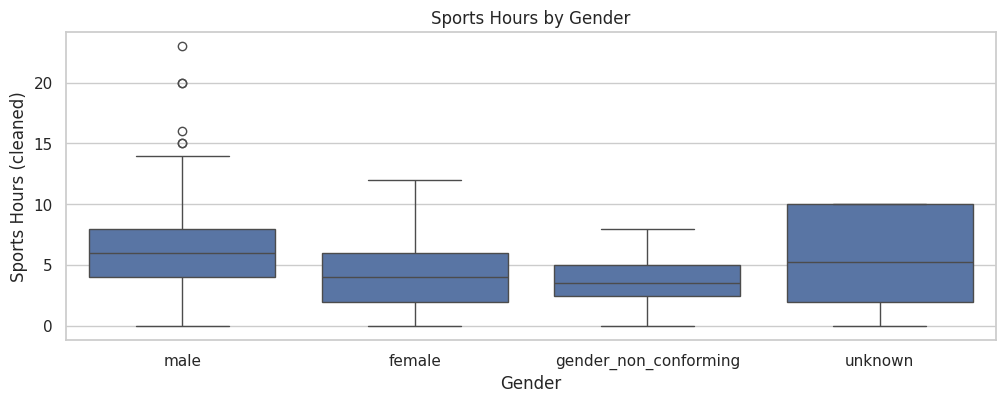

In [68]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df,
            x='GENDER_CATEGORIZED',
            y='SPORTS_HOURS_CLEANED')
plt.title("Sports Hours by Gender")
plt.xlabel("Gender")
plt.ylabel("Sports Hours (cleaned)")
plt.show()
